# Dataset recording August
To run this notebook, you need to select the environment we have been using for this project. In the top right of the notebook, click on `Select Kernel` and look for `faab-hyperparams .venv/bin/python` (it might be under `Select Another Kernel...`).

Once the notebook is running, make sure the piezos are connected to Bela.

Then, transfer the `faab-record` code to Bela. Run the `faab-record` project in Bela with the IDE (next cell)

You can check all piezos are working correctly by checking the Bela scope (click on the button with a sinusoidal wave, next to the stop button)

In [45]:
! cd ../../../ && rsync -rvL --stats --progress "bela-code/faab-record" root@bela.local:Bela/projects/

sending incremental file list
faab-record/Watcher.cpp
            174 100%    0.00kB/s    0:00:00 (xfr#1, to-chk=2/4)
faab-record/Watcher.h
         23,769 100%   22.67MB/s    0:00:00 (xfr#2, to-chk=1/4)
faab-record/render.cpp
          2,251 100%    2.15MB/s    0:00:00 (xfr#3, to-chk=0/4)

Number of files: 4 (reg: 3, dir: 1)
Number of created files: 0
Number of deleted files: 0
Number of regular files transferred: 3
Total file size: 26,194 bytes
Total transferred file size: 26,194 bytes
Literal data: 647 bytes
Matched data: 25,547 bytes
File list size: 0
File list generation time: 0.001 seconds
File list transfer time: 0.000 seconds
Total bytes sent: 1,050
Total bytes received: 308

sent 1,050 bytes  received 308 bytes  905.33 bytes/sec
total size is 26,194  speedup is 19.29


In [2]:
# import python libraries  & create folder where datasets will be saved
from pybela import Logger
import datetime
import os
from ipywidgets import widgets
from IPython.display import display

save_path = "../data/august-datasets"
os.makedirs(save_path, exist_ok=True)

In [ ]:
# connect to Bela
logger = Logger()
logger.connect()

Running in Jupyter notebook. Enabling nest_asyncio.


# Record and transfer dataset
To record a dataset, set the `time_in_seconds` and a `dataset_name` in the next cell. When you are ready, run the next two cells.

The cell after next will run both the dataset recording and the transfer of those files to the computer. 

Once the yellow banner shows with "⏳ Recording dataset", it means the dataset is being recorded in Bela, so you can play. Once the `time_in_seconds` finishes, the banner will change from yellow to green and the transfer of the files from Bela to the computer will start. Once the transfer finishes, you can come back to this cell, set a new dataset name and time, and repeat the process.

When you are ready, run the next two cells.


In [ ]:

### set dataset parameters here!!!!!!! ###

time_in_seconds = 5 * 60  # 5 minutes, you can test with 1 second at first to check everything works
dataset_name = "drone_example"

### end of dataset parameters ###


yellow_recording_banner_html = f'<div style="background-color: #fff3cd; border: 1px solid #ffeaa7; padding: 10px; border-radius: 5px; color: #856404;"><h1><strong>⏳ Recording dataset {dataset_name} in progress...</strong></h1></div>'
green_recording_banner_html = f'<div style="background-color: #d4edda; border: 1px solid #c3e6cb; padding: 10px; border-radius: 5px; color: #155724;"><h1><strong>✅ Dataset {dataset_name} recording complete!</strong></h1></div>'
yellow_transfer_banner_html = f'<div style="background-color: #fff3cd; border: 1px solid #ffeaa7; padding: 10px; border-radius: 5px; color: #856404;"><h1><strong>⏳ Transferring dataset {dataset_name} from Bela to {save_path}...</strong></h1></div>'
green_transfer_banner_html = f'<div style="background-color: #d4edda; border: 1px solid #c3e6cb; padding: 10px; border-radius: 5px; color: #155724;"><h1><strong>✅ Dataset {dataset_name} transfer complete!</strong></h1></div>'

recording_banner = widgets.HTML(value=yellow_recording_banner_html)
transfer_banner = widgets.HTML(value=yellow_transfer_banner_html)

In [ ]:
date = datetime.datetime.now().strftime("%m%d%H%M")

### dataset recording ###
paths = logger.start_logging(transfer=False)
display(recording_banner)
logger.wait(time_in_seconds)
logger.stop_logging()
recording_banner.value = green_recording_banner_html

### dataset transferring ###
display(transfer_banner)
for sensor in paths["remote_paths"]:
    print(paths["remote_paths"][sensor])
    logger.copy_file_from_bela(
        paths["remote_paths"][sensor],
        os.path.join(save_path, f"{date}-{dataset_name}-{sensor}.bin"),
        verbose=True,
    )

transfer_banner.value = green_transfer_banner_html

Stopped logging variables ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5', 'gFaabSensor_6', 'gFaabSensor_7', 'gFaabSensor_8']...
Started logging variables ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5', 'gFaabSensor_6', 'gFaabSensor_7', 'gFaabSensor_8']... Run stop_logging() to stop logging.


HTML(value='<div style="background-color: #fff3cd; border: 1px solid #ffeaa7; padding: 10px; border-radius: 5p…

Stopped logging variables ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5', 'gFaabSensor_6', 'gFaabSensor_7', 'gFaabSensor_8']...


HTML(value='<div style="background-color: #fff3cd; border: 1px solid #ffeaa7; padding: 10px; border-radius: 5p…

/root/Bela/projects/faab-run/gFaabSensor_1+7.bin
Transferring /root/Bela/projects/faab-run/gFaabSensor_1+7.bin-->../data/august-datasets/08131811-drone-gFaabSensor_1.bin... Done.
/root/Bela/projects/faab-run/gFaabSensor_2+7.bin
Transferring /root/Bela/projects/faab-run/gFaabSensor_2+7.bin-->../data/august-datasets/08131811-drone-gFaabSensor_2.bin... Done.
/root/Bela/projects/faab-run/gFaabSensor_3+7.bin
Transferring /root/Bela/projects/faab-run/gFaabSensor_3+7.bin-->../data/august-datasets/08131811-drone-gFaabSensor_3.bin... Done.
/root/Bela/projects/faab-run/gFaabSensor_4+7.bin
Transferring /root/Bela/projects/faab-run/gFaabSensor_4+7.bin-->../data/august-datasets/08131811-drone-gFaabSensor_4.bin... Done.
/root/Bela/projects/faab-run/gFaabSensor_5+7.bin
Transferring /root/Bela/projects/faab-run/gFaabSensor_5+7.bin-->../data/august-datasets/08131811-drone-gFaabSensor_5.bin... Done.
/root/Bela/projects/faab-run/gFaabSensor_6+7.bin
Transferring /root/Bela/projects/faab-run/gFaabSensor_6+

## Data processing

discovered sensors were plugged in wrong order so renamed binaries 

8<-->5
7<-->6

In [8]:
from dataset import convert_binary_dataset_to_dict

sr = 44100 # Bela audio sample rate
vars = ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5','gFaabSensor_6','gFaabSensor_7', 'gFaabSensor_8' ]

exps = ["drone_example", "feedback_bloom", "multiphonics", "pizzicato_harmonics", "waveset_harmonics"]

for exp in exps:
    path = f"0814/{exp}"
    convert_binary_dataset_to_dict(path, vars, sr, tail_to_remove_in_seconds=0.5)

Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_1...
Processed gFaabSensor_1 – 6619375 points, 5.003 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_2...
Processed gFaabSensor_2 – 6619375 points, 5.003 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_3...
Processed gFaabSensor_3 – 6619375 points, 5.003 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_4...
Processed gFaabSensor_4 – 6619375 points, 5.003 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_5...
Processed gFaabSensor_5 – 6619375 points, 5.003 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_6...
Processed gFaabSensor_6 – 6619375 points, 5.003 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_7...
Processed gFaabSensor_7 – 6619375 points, 5.003 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_8

### plot raw datasets

In [9]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

vars = ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5','gFaabSensor_6','gFaabSensor_7', 'gFaabSensor_8' ]

exps = ["drone_example", "feedback_bloom", "multiphonics", "pizzicato_harmonics", "waveset_harmonics"]

data = {exp:{} for exp in exps}
for exp in exps:
    path = f"data/0814/{exp}/raw.pkl"
    with open(path, "rb") as f:
        data[exp] = pickle.load(f)

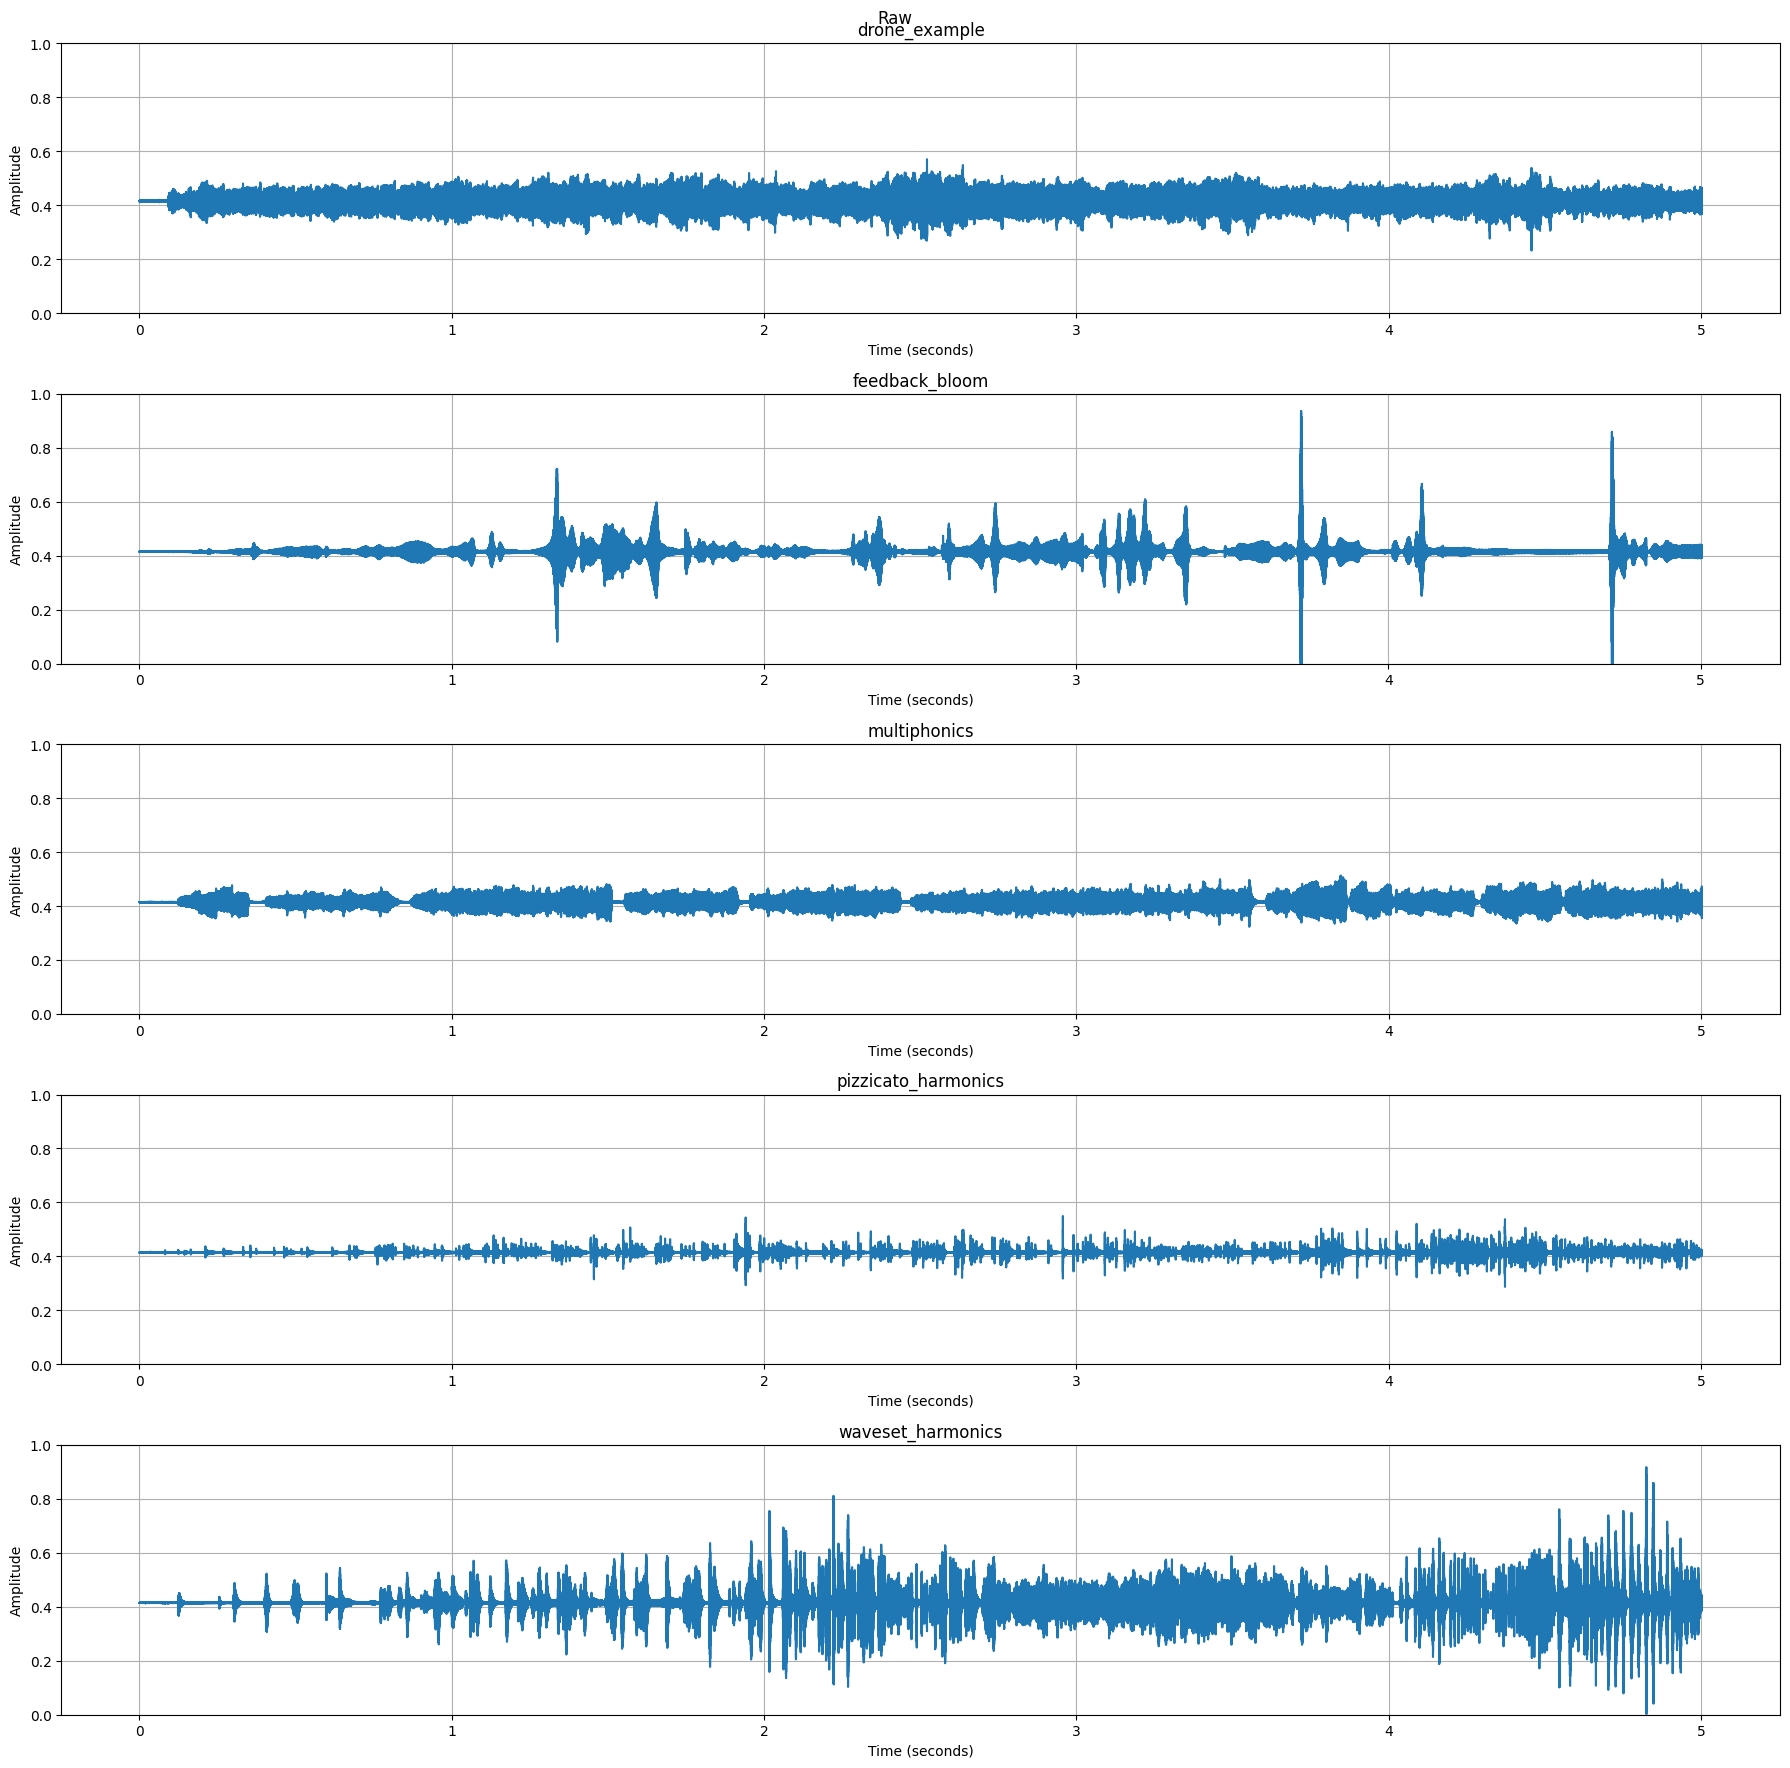

In [10]:
# test plot

fig, axs = plt.subplots(len(exps), 1, figsize=(18, 18))

for idx, exp in enumerate(exps):
    _data = data[exp]['gFaabSensor_5']

    t = np.linspace(0, len(_data) / 22050 / 60, len(_data))
    axs[idx].plot(t, _data, label='gFaabSensor_5')
    axs[idx].set_xlabel('Time (seconds)')
    axs[idx].set_ylabel('Amplitude')
    axs[idx].set_ylim(0.0, 1)  # Limit x-axis to first 10 seconds
    axs[idx].grid()
    axs[idx].set_title(exp)

plt.suptitle("Raw")
plt.tight_layout()
plt.show()

## filter data

In [ ]:
import pickle

vars = ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5','gFaabSensor_6','gFaabSensor_7', 'gFaabSensor_8' ]
exps = ["drone_example", "feedback_bloom", "multiphonics", "pizzicato_harmonics", "waveset_harmonics"]

data = {exp:{} for exp in exps}
for exp in exps:
    path = f"data/0814/{exp}/raw.pkl"
    with open(path, "rb") as f:
        data[exp] = pickle.load(f)

In [2]:
from scipy import signal

lowpass_freq = 5000
highpass_freq = 2

filtered = {exp: {var: [] for var in vars} for exp in exps}
for exp in exps:
    for var in vars:
        sos_hp = signal.butter(2, highpass_freq, 'high', fs = 22050, output='sos')
        out_hp = signal.sosfilt(sos_hp, data[exp][var])
        sos_lp = signal.butter(2, lowpass_freq, 'low', fs = 22050, output='sos')
        out = signal.sosfilt(sos_lp, out_hp)
        filtered[exp][var] = out[3*1024:] # remove first 100 samples to avoid filter warmup


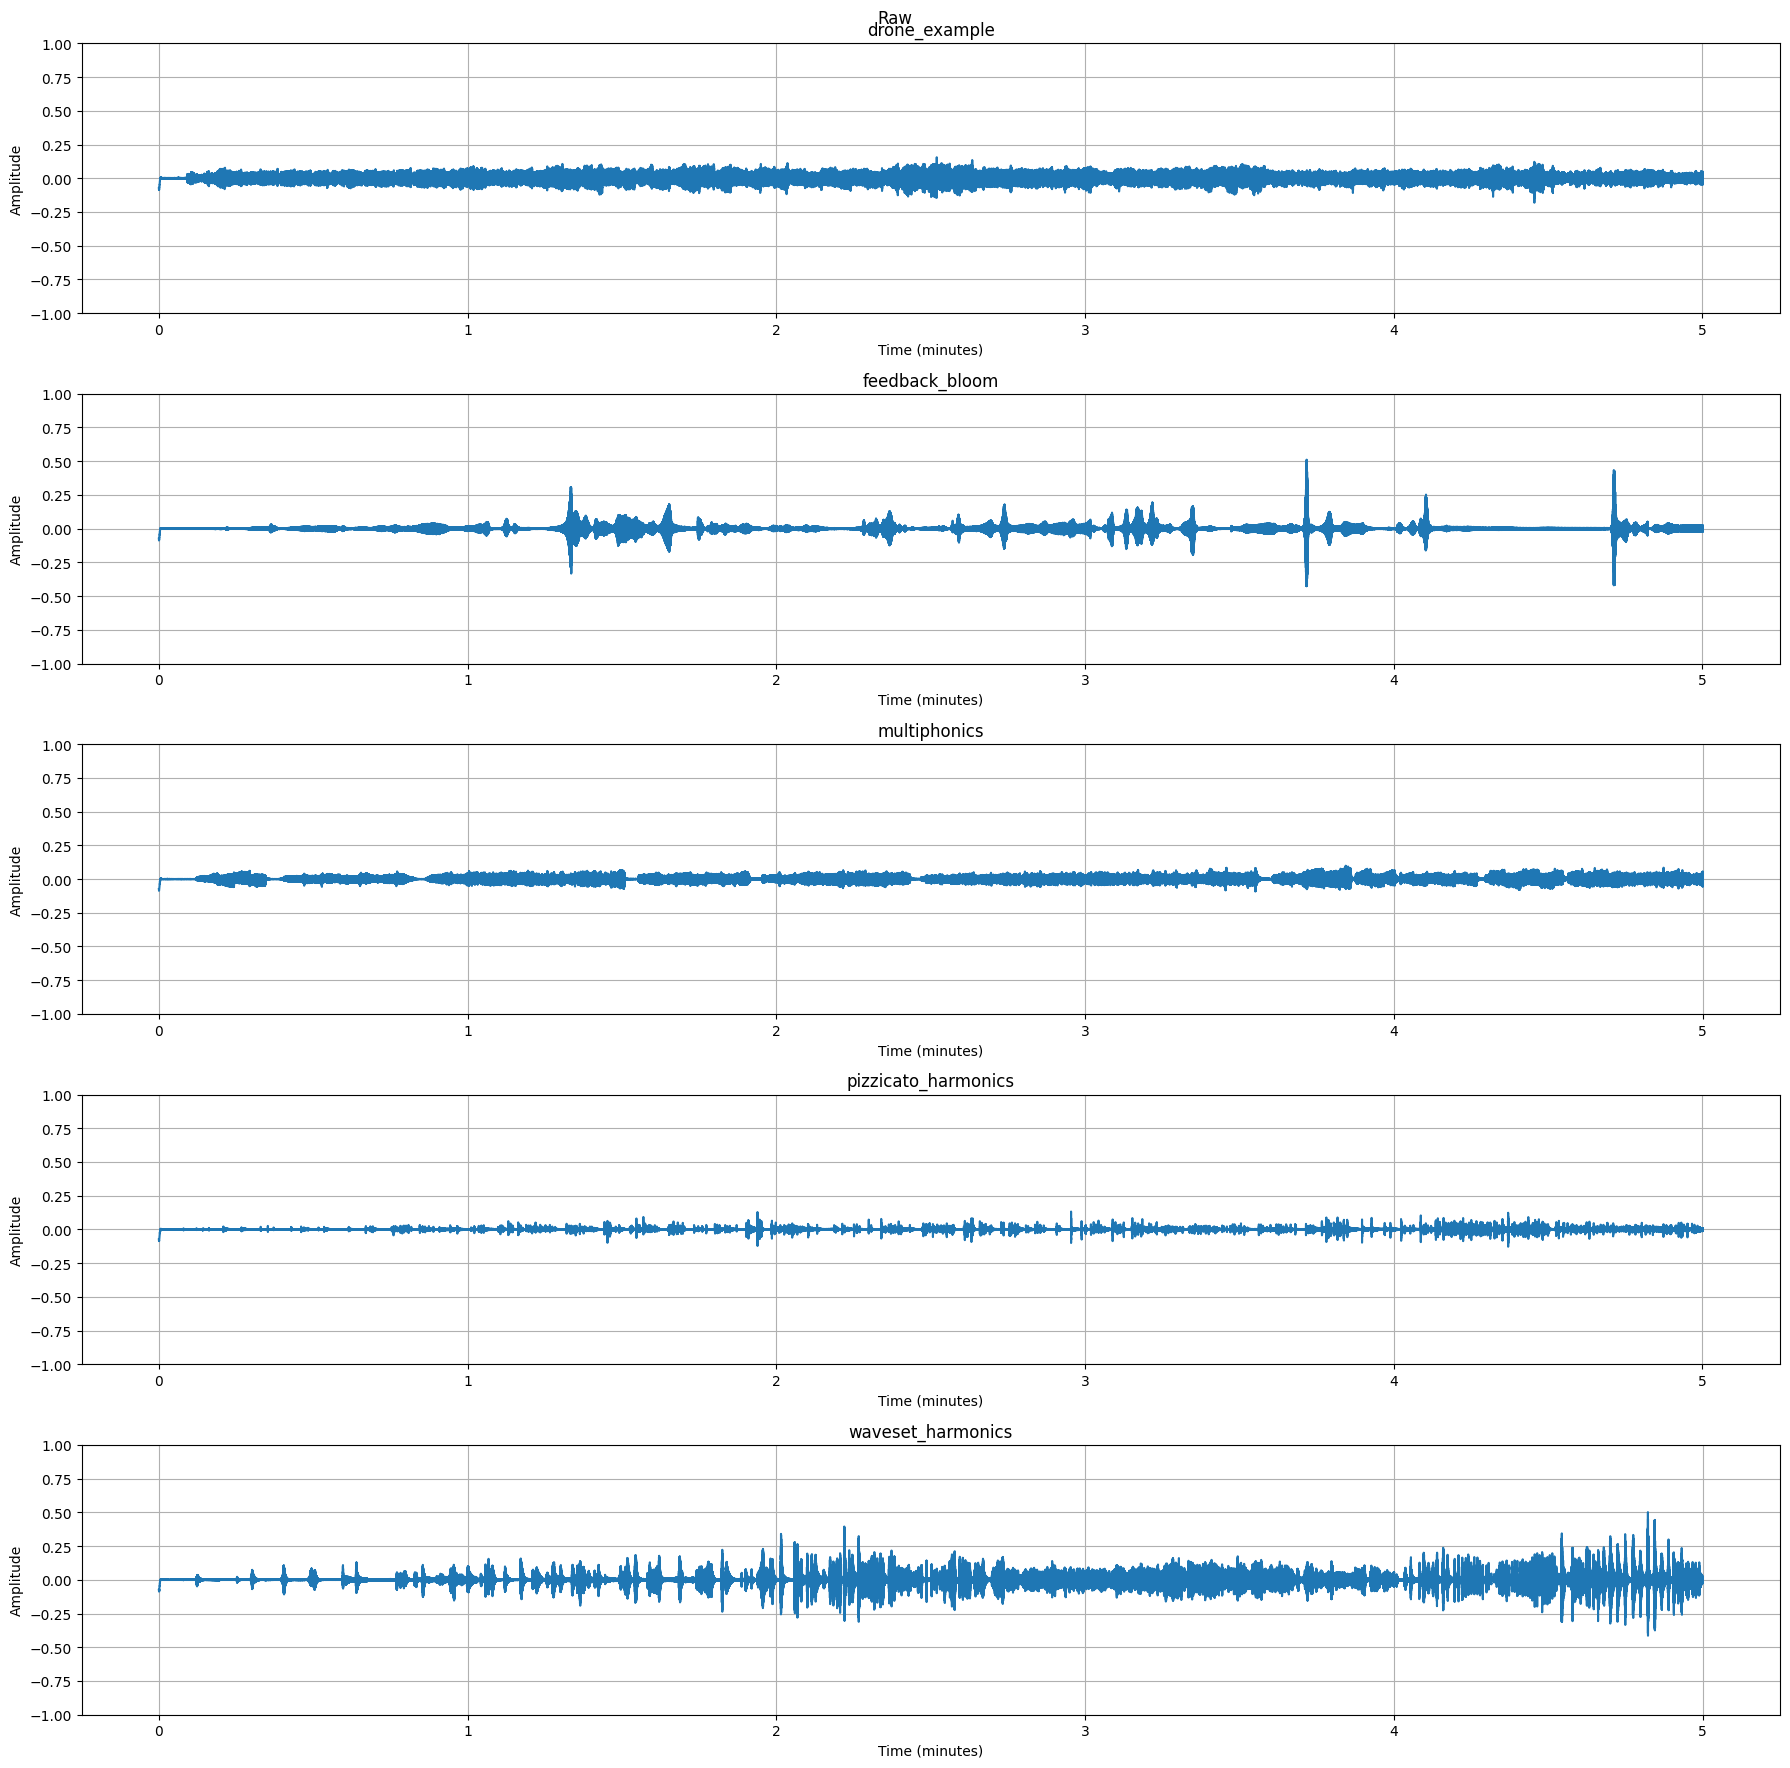

In [5]:
#test plot
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(len(exps), 1, figsize=(18, 18))

for idx, exp in enumerate(exps):
    _data = filtered[exp]

    t = np.linspace(0, len(_data['gFaabSensor_5']) / 22050 / 60, len(_data['gFaabSensor_5']))
    axs[idx].plot(t, _data['gFaabSensor_5'], label='gFaabSensor_5')
    axs[idx].set_xlabel('Time (minutes)')
    axs[idx].set_ylabel('Amplitude')
    axs[idx].set_ylim(-1, 1)
    axs[idx].grid()
    axs[idx].set_title(exp)

plt.suptitle("Raw")
plt.tight_layout()
plt.show()

In [6]:
for exp in exps:
    path = f"data/0814/{exp}/filtered.pkl"
    with open(path, "wb") as f:
        pickle.dump(filtered[exp], f)

## generate dataset

In [9]:
from dataset import Dataset

seq_len = 1024
n_features = len(vars)

datasets = {exp: None for exp in exps}
for exp in exps:
    path = f"data/0814/{exp}/filtered.pkl"
    datasets[exp] = Dataset(feature_names=vars, pickle_path=path, seq_len=seq_len, device="cpu", normalise=False)


torch.Size([6461, 1024, 8])
torch.Size([6462, 1024, 8])
torch.Size([6462, 1024, 8])
torch.Size([6463, 1024, 8])
torch.Size([6460, 1024, 8])
torch.Size([6461, 1024, 8])
torch.Size([6461, 1024, 8])
torch.Size([6462, 1024, 8])
torch.Size([6460, 1024, 8])
torch.Size([6461, 1024, 8])


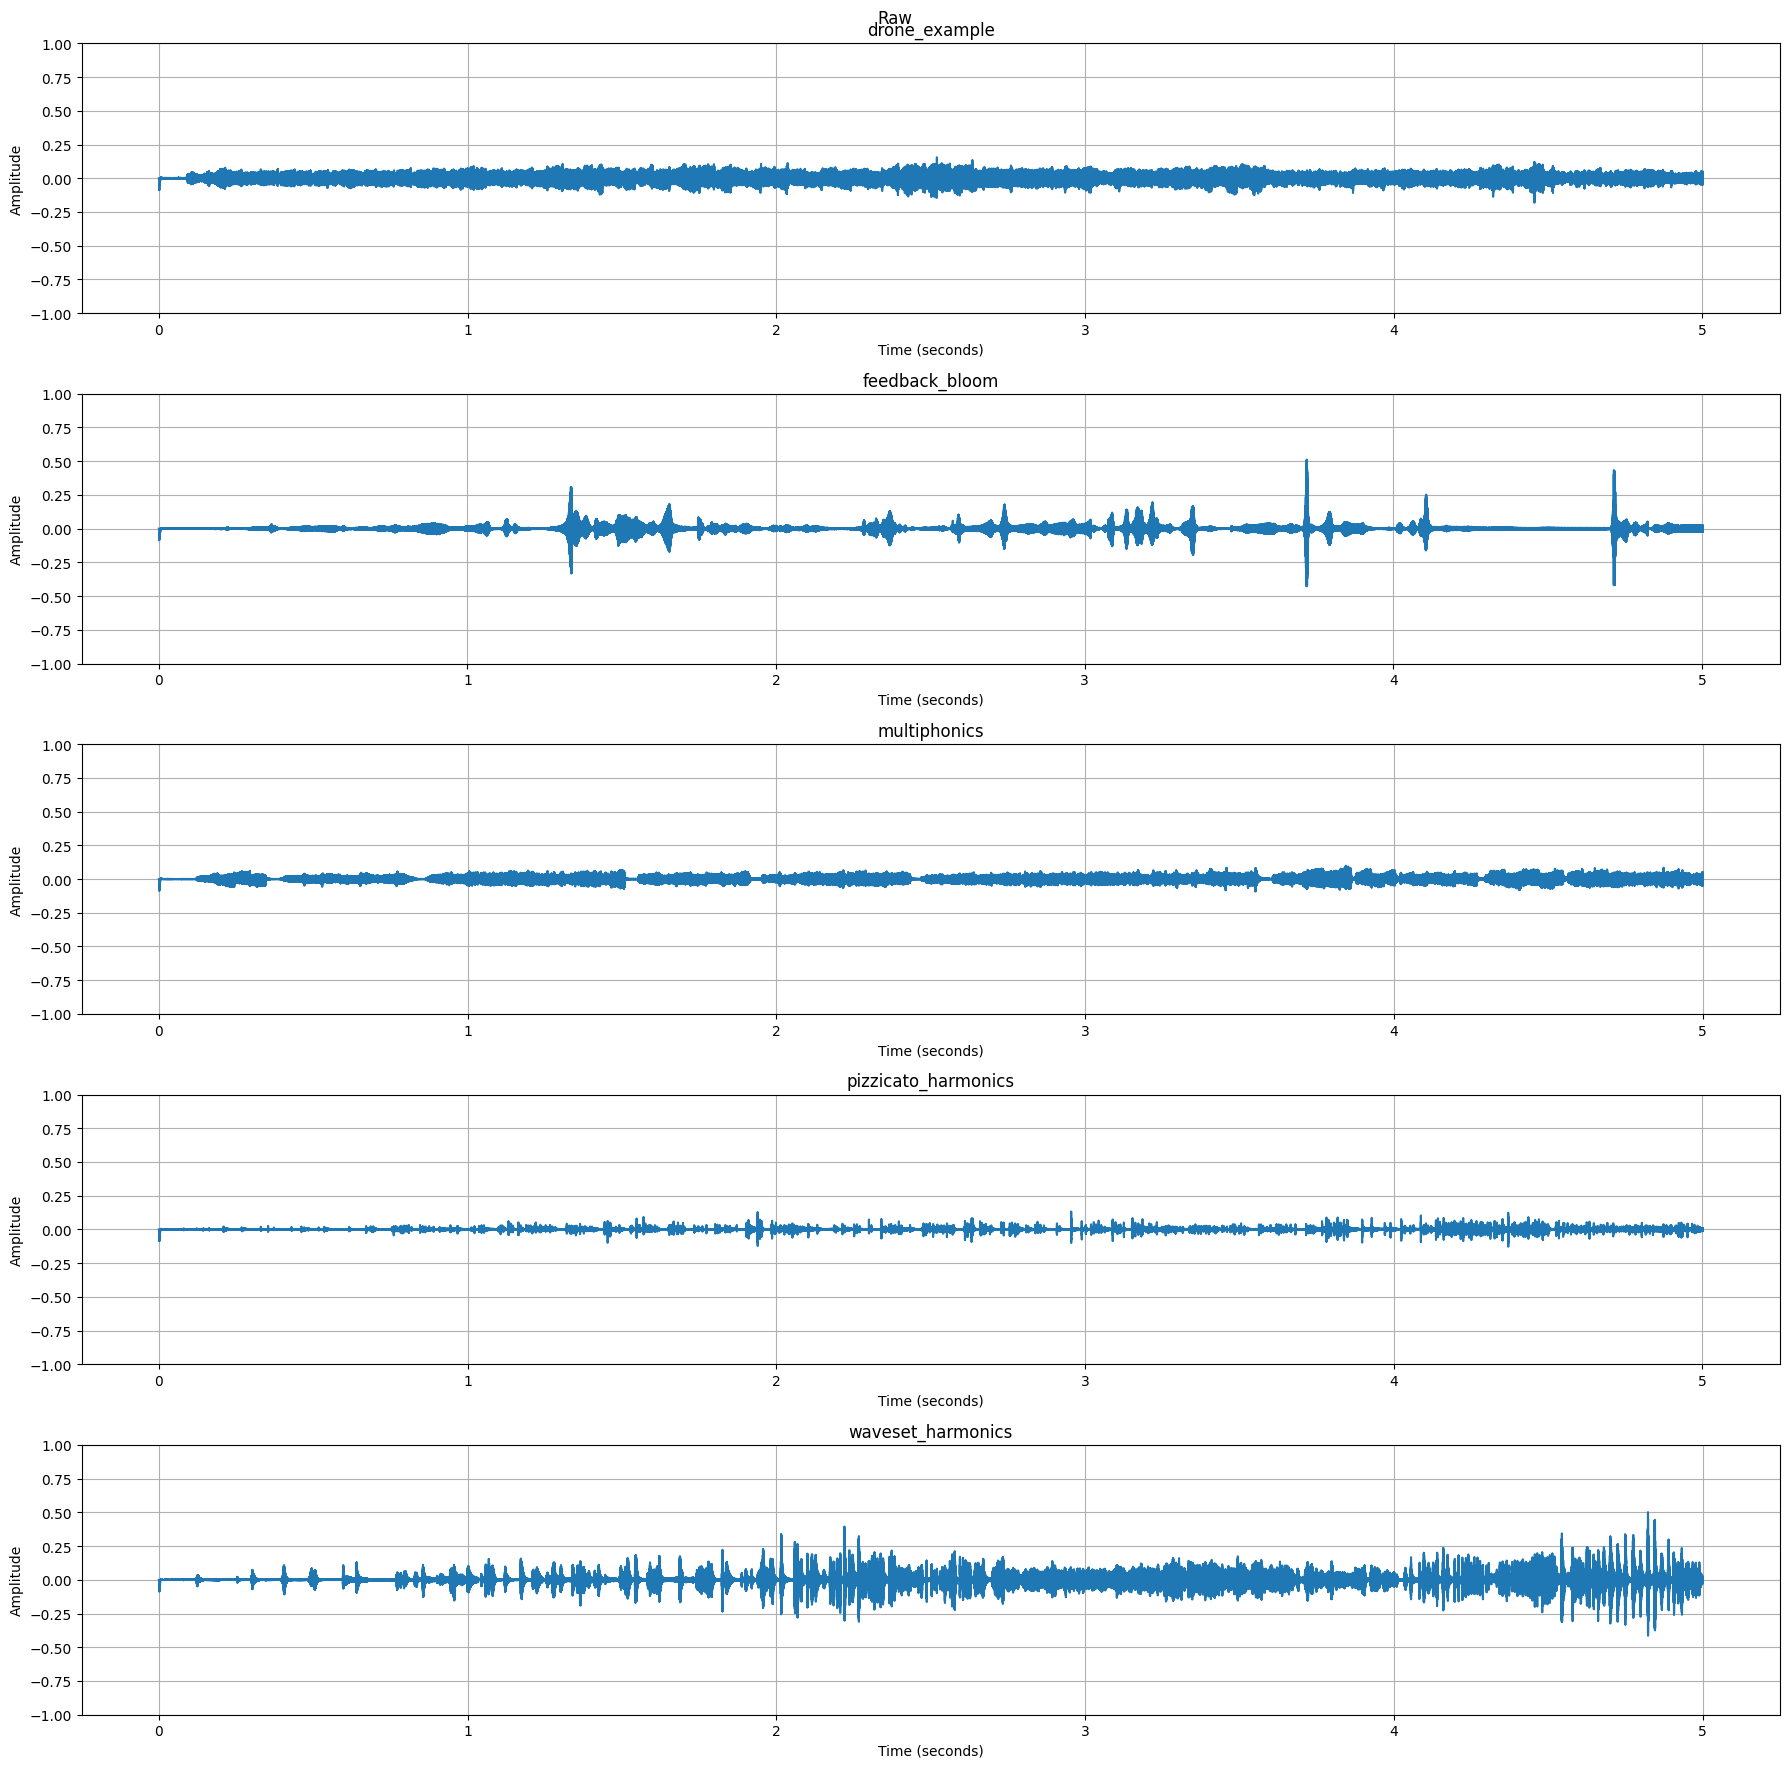

In [11]:
# test plot

fig, axs = plt.subplots(len(exps), 1, figsize=(18, 18))

for idx, exp in enumerate(exps):
    test = datasets[exp].inputs[:,:,4].view(-1)

    t = np.linspace(0, len(test) / 22050 / 60, len(test))
    axs[idx].plot(t, test, label='gFaabSensor_3')
    axs[idx].set_xlabel('Time (seconds)')
    axs[idx].set_ylabel('Amplitude')
    axs[idx].set_ylim(-1, 1)
    axs[idx].grid()
    axs[idx].set_title(exp)

plt.suptitle("Raw")
plt.tight_layout()
plt.show()

In [ ]:
# save datasets
for exp in exps:
    path = f"data/0814/{exp}/processed.pkl"
    with open(path, "wb") as f:
        pickle.dump(datasets[exp], f)

: 

## compute weights for loss

In [18]:
avg = {exp: {var: [] for var in vars} for exp in exps}

for exp in exps:
    _avg = avg[exp]
    for var in vars:
        _avg[var].append(np.mean(np.abs(filtered[exp][var])))

    print(_avg)
    
    max_idx = np.argmax(list(_avg.values()))

    weights = {var: 1/_avg[var][0]/_avg[vars[max_idx]][0] for var in vars}

    print(weights)

    path = f"data/0814/{exp}/weights.pkl"
    with open(path, "wb") as f:
        pickle.dump(weights, f)


{'gFaabSensor_1': [0.002048130895624149], 'gFaabSensor_2': [0.014772415085100134], 'gFaabSensor_3': [0.003940124620327626], 'gFaabSensor_4': [0.010782371687461033], 'gFaabSensor_5': [0.01481390993875796], 'gFaabSensor_6': [0.007119404599690835], 'gFaabSensor_7': [0.0040488517257292345], 'gFaabSensor_8': [0.0049984070485151145]}
{'gFaabSensor_1': 32958.89107360873, 'gFaabSensor_2': 4569.606439061919, 'gFaabSensor_3': 17132.48427349386, 'gFaabSensor_4': 6260.60064056876, 'gFaabSensor_5': 4556.806634604716, 'gFaabSensor_6': 9481.709059813853, 'gFaabSensor_7': 16672.411751806227, 'gFaabSensor_8': 13505.127221165907}
{'gFaabSensor_1': [0.001600433295901879], 'gFaabSensor_2': [0.010120685460892861], 'gFaabSensor_3': [0.0021701686064240716], 'gFaabSensor_4': [0.0016888550404624031], 'gFaabSensor_5': [0.01074142652892666], 'gFaabSensor_6': [0.00534941993448572], 'gFaabSensor_7': [0.0018564452780581696], 'gFaabSensor_8': [0.0006078120864090385]}
{'gFaabSensor_1': 58170.186979309874, 'gFaabSenso

## generate a mini dataset for testing training loop locally

In [ ]:
exp = ""

_path=""

dataset = Dataset(feature_names=vars, pickle_path=_path, device="cpu", n_items=100)

_save_path = f"mini_{exp}.pkl"

: 